In [2]:
import sys
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:

x = np.linspace(0,1,100)

def get_pdf(x, alpha, beta):
    return scipy.stats.beta.pdf(x, alpha, beta)

In [4]:
def plot_pdfs(n0, n1, alpha, beta, ax):
    prior = get_pdf(x, alpha, beta)
    likelihood = get_pdf(x, n1+1, n0+1)
    posterior = scipy.stats.beta.pdf(x, alpha+n1, beta+n0)
    ax.plot(x, prior, "black", label=f"prior Beta({alpha},{beta})")
    ax.plot(x, likelihood, "r", linestyle="dotted", label=f"likelihood Beta({n1+1},{n0+1})")
    ax.plot(x, posterior, "b--", label=f"prior Beta({alpha+n1},{beta+n0})")
    ax.legend()
    ax.set_title(f"n0={n0}, n1={n1}, alpha={alpha}, beta={beta}")

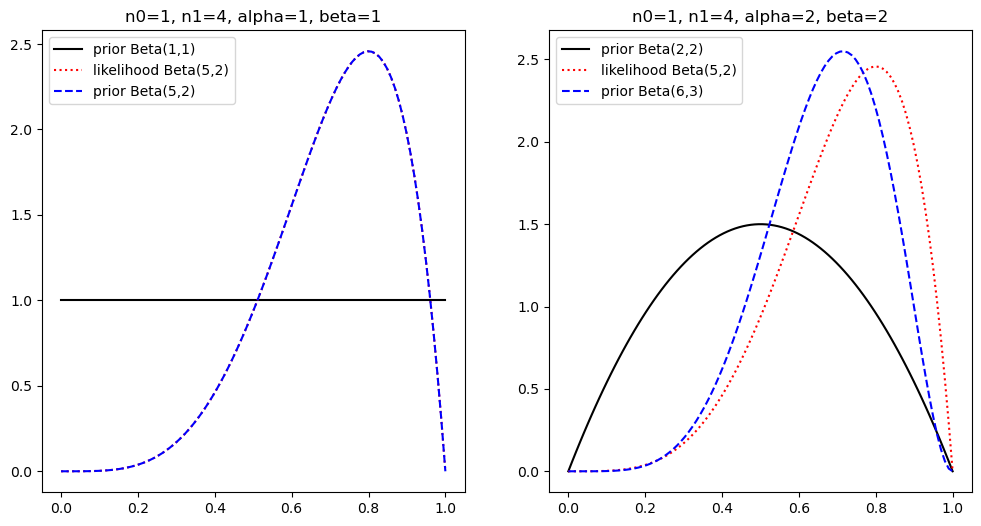

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_pdfs(n0=1, n1=4, alpha=1, beta=1, ax=axes[0])
plot_pdfs(n0=1, n1=4, alpha=2, beta=2, ax=axes[1])
plt.show()

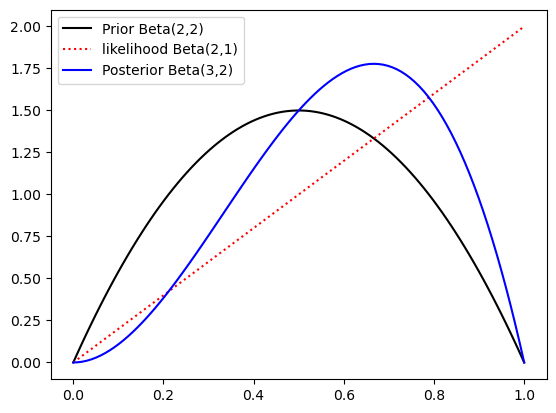

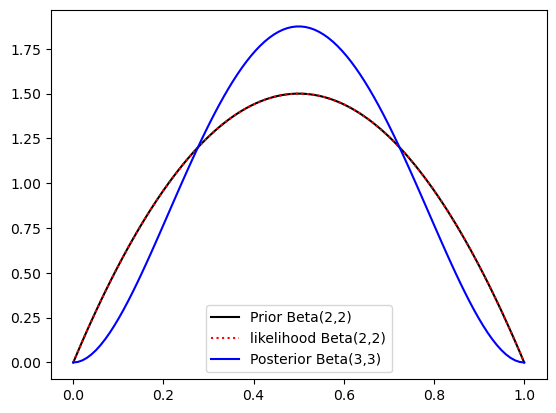

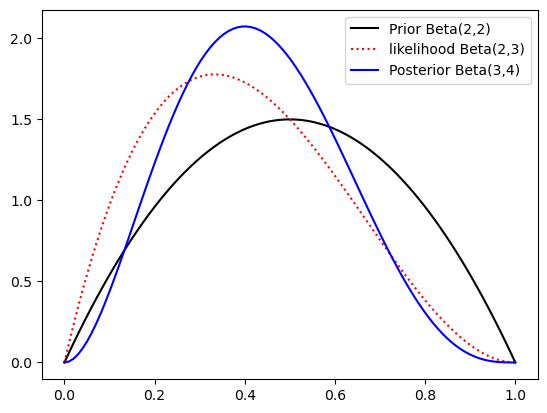

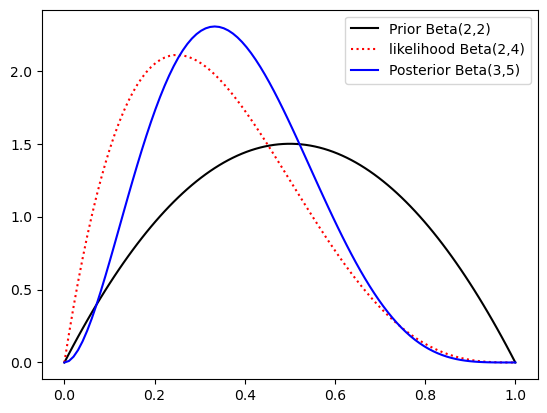

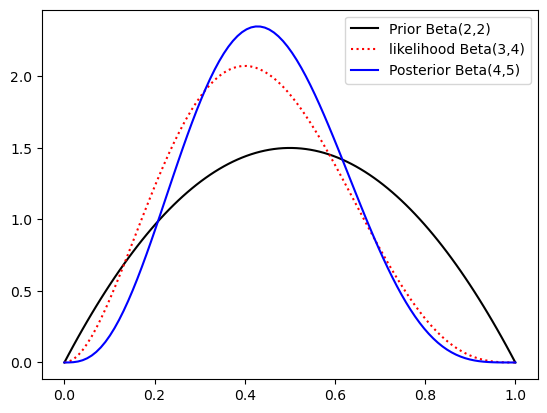

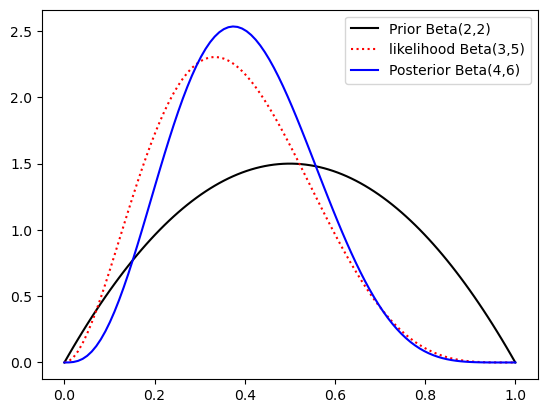

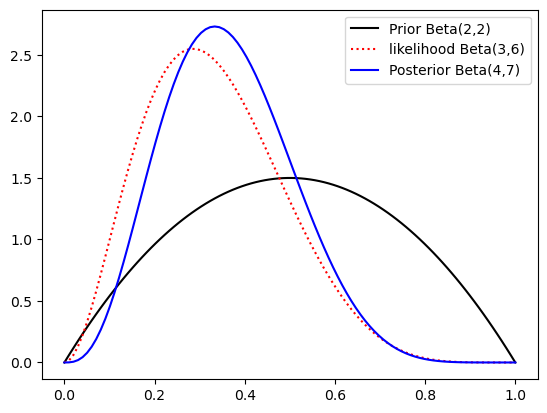

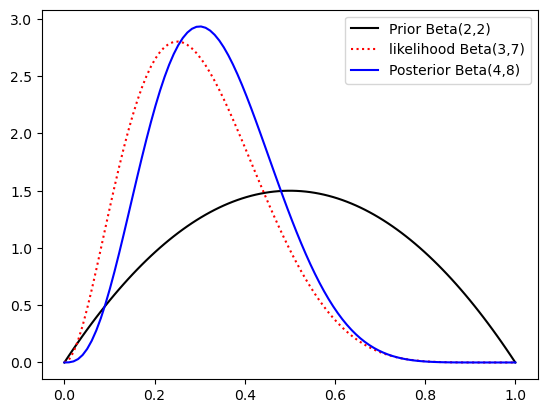

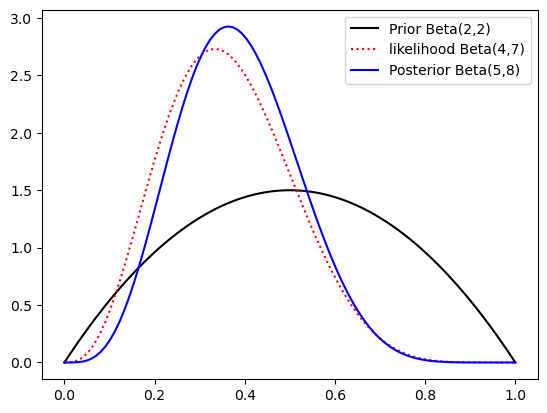

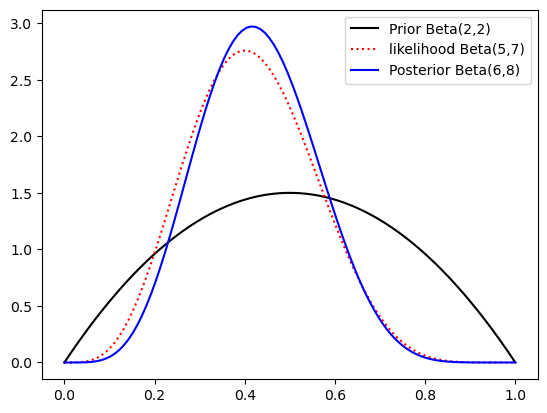

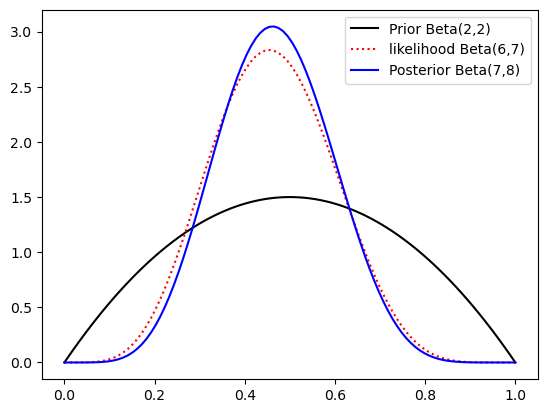

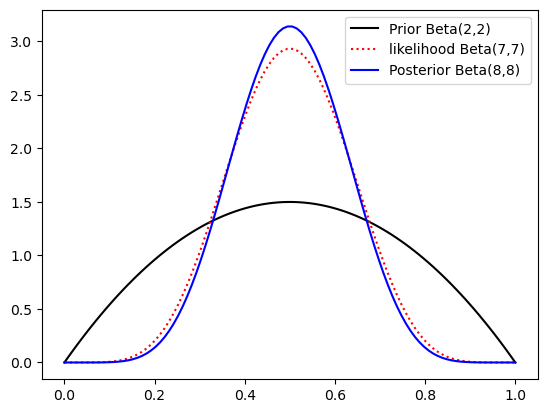

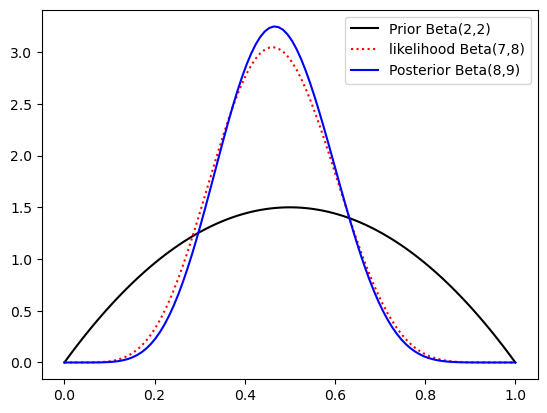

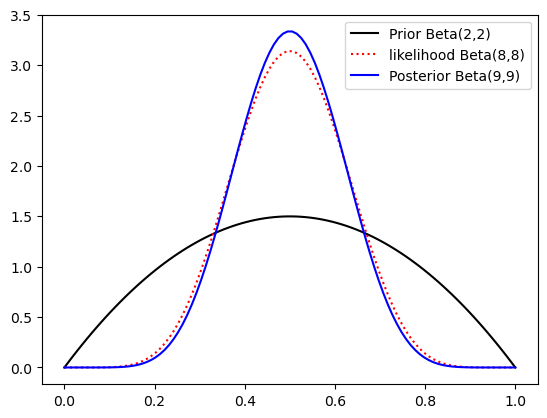

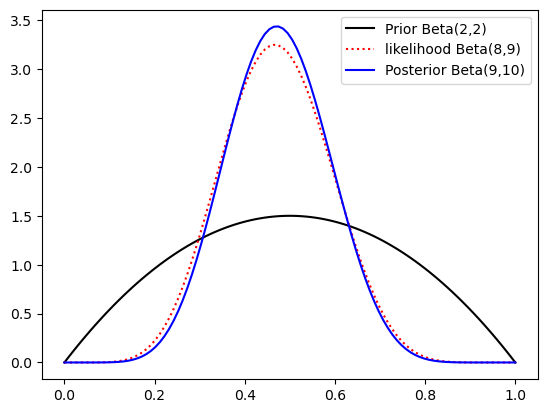

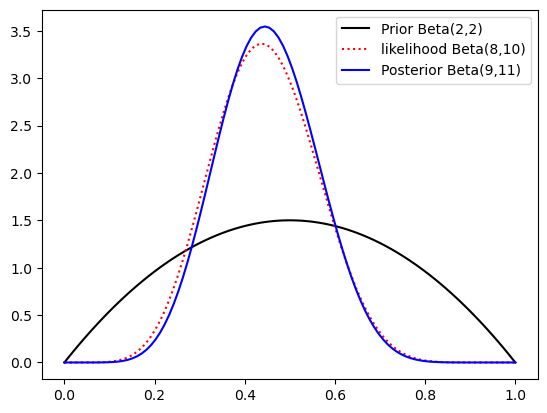

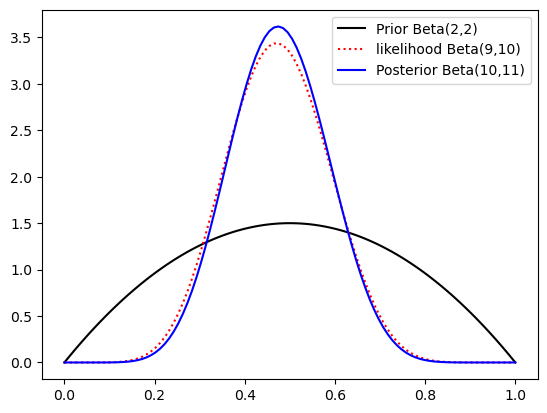

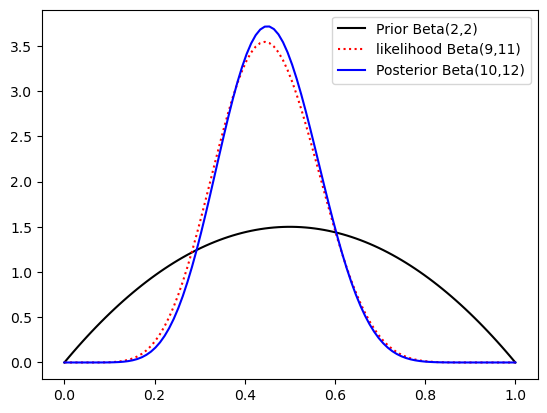

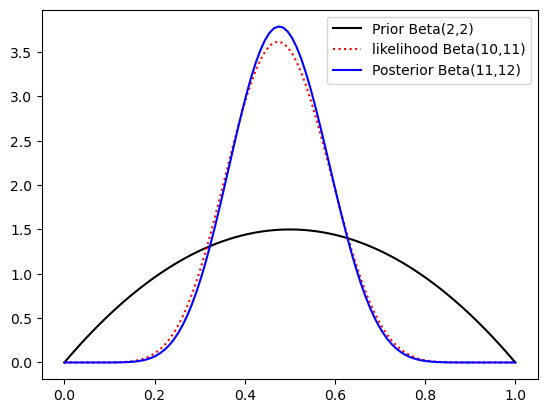

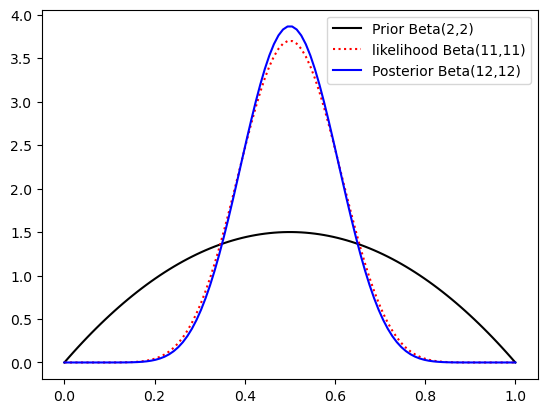

In [8]:
fig, ax = plt.subplots()
# Initial parameters
alpha, beta = 2, 2  # Prior belief
n0, n1 = 0, 0  # Initial number of tails and heads
num_tosses = 20 # Number of tosses to simulate

# Function to update the plot
def update():
    global n0, n1  # Keep track of heads and tails

    # Simulate a coin toss (1 = heads, 0 = tails)
    toss = np.random.choice([0, 1])
    if toss == 1:
        n1 += 1
    else:
        n0 += 1

    # Compute PDFs
    prior = get_pdf(x, alpha, beta)
    likelihood = get_pdf(x, n1+1, n0+1)
    posterior = scipy.stats.beta.pdf(x, alpha+n1, beta+n0)

    # Plot the prior and posterior
    plt.plot(x, prior, "black", label=f"Prior Beta({alpha},{beta})")
    plt.plot(x, likelihood, "r", linestyle="dotted", label=f"likelihood Beta({n1+1},{n0+1})")
    plt.plot(x, posterior, "b-", label=f"Posterior Beta({alpha+n1},{beta+n0})")
    plt.legend()
    plt.show()

for _ in range(num_tosses): update()


